# Medical Cost Personal Insurance Project

#    Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to
an illness. These expenses could be related to hospitalisation costs, cost of medicines
or doctor consultation fees. The main purpose of medical insurance is to receive the
best medical care without any strain on your finances. Health insurance plans offer
protection against high medical costs. It covers hospitalization expenses, day care
procedures, domiciliary expenses, and ambulance charges, besides many others.
Based on certain input features such as age , bmi,,no of dependents ,smoker ,region
medical insurance is calculated .

# Columns

     age: age of primary beneficiary
     sex: insurance contractor gender, female, male
     bmi: Body mass index, providing an understanding of body, weights that are
    relatively high or low relative to height, objective index of body weight (kg / m ^ 2)
    using the ratio of height to weight, ideally 18.5 to 24.9.
     children: Number of children covered by health insurance / Number of
    dependents
     smoker: Smoking
     region: the beneficiary&#39;s residential area in the US, northeast, southeast,
    southwest, northwest.
     charges: Individual medical costs billed by health insurance

# Predict : Can you accurately predict insurance costs?

Dataset Link-
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Rows and columns 
print('Number of rows:', insurance_df.shape[0]," ",'Number of columns:', insurance_df.shape[1]) 


Number of rows: 1338   Number of columns: 7


In [4]:
# Check the dataframe info
insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# EXPLORATORY DATA ANALYSIS 

In [5]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values

<AxesSubplot:>

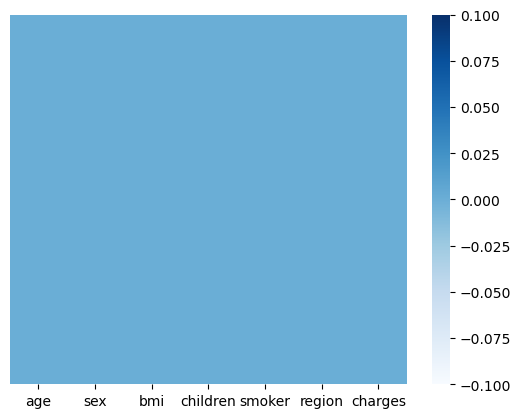

In [6]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cmap="Blues")

In [7]:
# Get idea of mean, max and avg age, bmi, children and charges
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observation:
    
    1 THE COUNT FOR ALL THE COLUMNS IS SAME SO THERE IS NO MISSING VALUES
    2 THE MEAN IS GRATER THEN MEDIAN IN CHARGES SO DATA IS RIGHT SKEWED
    3 THERE IS A SIGNIFICANTS GAP B/W 75% PERCENTILE AND THE MAX VALUE SO THERE IS ACHANCES OF OUTLIERS PRESENT THE COLUMN OF CHILDREN,CHARGES AND BMI
    4 FROM THESE WE CAN ALSO SEE THE STD, MEANS AND THE MINIMUM VALUE

In [8]:
# General statistical description of Categorical variables
insurance_df.describe(include=['object'])


,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Based on the results from describe, we also see these variables are at the top and more frequent in the dataset: male, non-smoker, southeast region

Grouping by region to see any relationship between region and charges

In [9]:
df_region = insurance_df.groupby(by = 'region').mean(('age'),('bmi'),('charges'))
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Seems like south east region has the highest charges and body mass index

    #Grouping data by 'age' and examine the relationship between 'age' and 'charges'

In [10]:
df_age = insurance_df.groupby(by = 'age').mean(('bmi'),('charges'))
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


As customers' age increses, the charges tend to increase as well. This makes sense because as people age, they have more health problems, hence more usage of insurance

# Visualizing The Data


<AxesSubplot:xlabel='charges', ylabel='Density'>

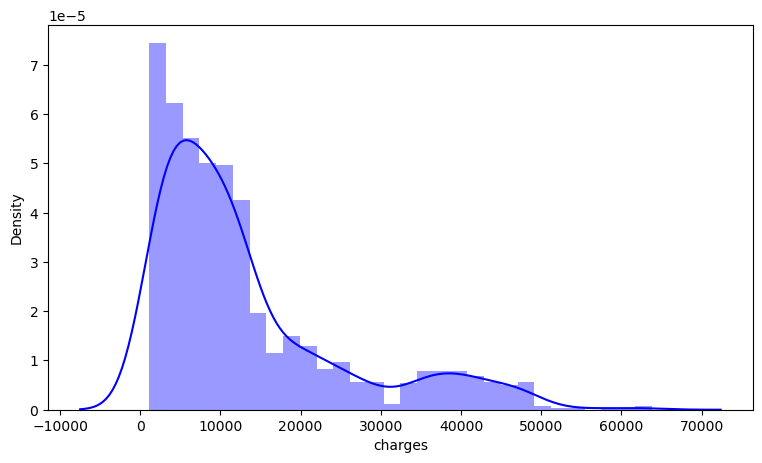

In [11]:
# Distribution of the charges
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(insurance_df.charges, color = 'b')



The distribution of the charges is skewed to the right, so we will apply natural log for ~ normal distribution.



<AxesSubplot:xlabel='charges', ylabel='Density'>

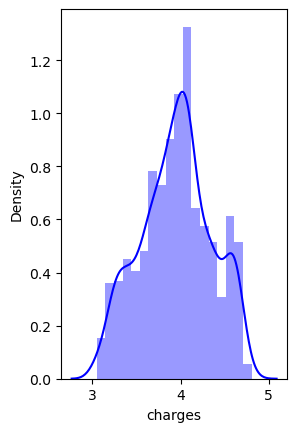

In [12]:
# Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(insurance_df.charges), color = 'b')


# Visualizing distribution of numerical variables vs medical charges


Text(0.5, 1.0, 'Distribution of BMI')

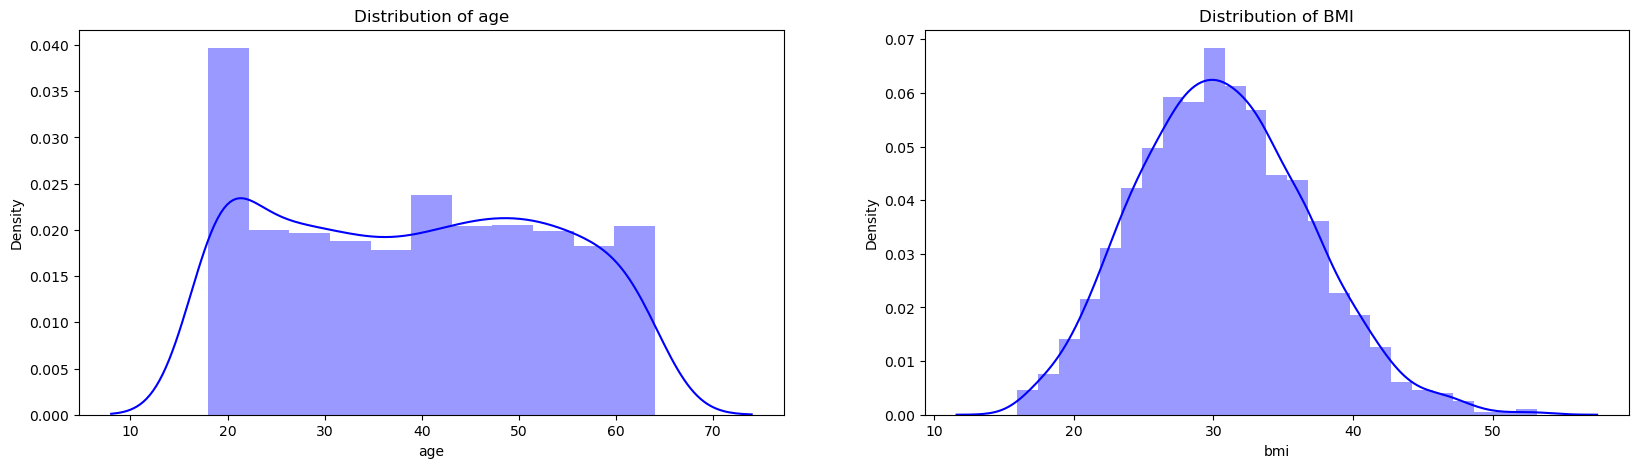

In [15]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(insurance_df.age, color = 'b').set_title('Distribution of age')
plt.subplot(1,2,2)
sns.distplot(insurance_df.bmi, color = 'b').set_title('Distribution of BMI')


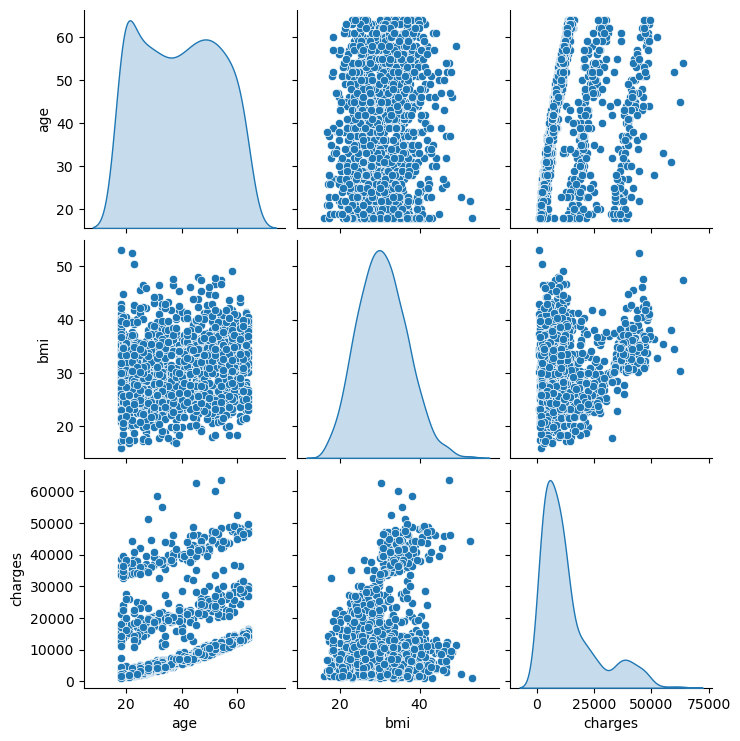

In [16]:
# Pairplot for Age, BMI, Charges
df_num =insurance_df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()


The pairplot reveals that there is a linear relationship between age, bmi with charges

 the categorical variables are translated into numeric or binary values to represent either 0 or 1. For example, instead of "SEX" with males or females, the "Male" variable would be true (1) if the person is male. And "female" would be (0) see table III; following this phase now, we can apply this data to all regression models used in this study.

# Visualizing categorical variables individually vs medical charges


plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = insurance_df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = insurance_df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = insurance_df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = insurance_df)

Based on figures I, 2, 3, and VI, 
    
    we can say that region does not  have much  impact on  medical cost.
    And smokers spend a lot more on medical costs.
    Charges are not affected by Gender  .
    People  with  two  children  have  more  medical expenses. In contrast, People with  Five children have fewer expenses.
    
Then we Check the correlation between variables. 

# Bi-Variate Analysis

Charges by region

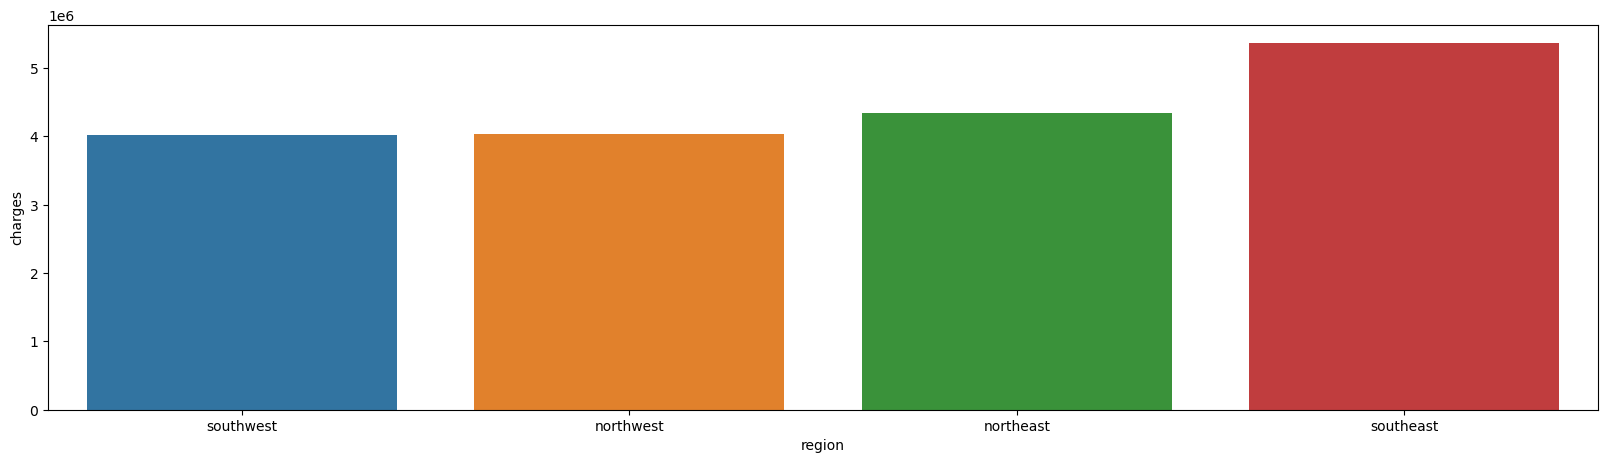

In [21]:
charges = insurance_df['charges'].groupby(insurance_df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = charges.index, y = charges)


The highest amount of charges are in the Southeast while the lowest are in the Southwest. Based on this, let's see how charges change by region when accounting for other factors, such as number of children, gender, and smoking behavior.



Charges by region and number of children

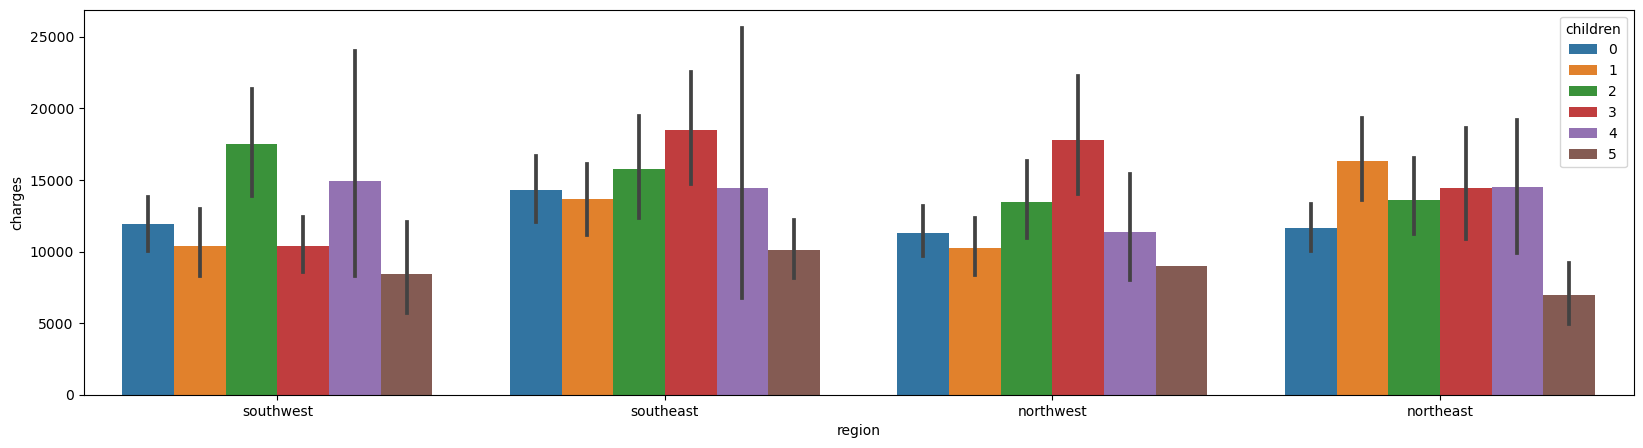

In [22]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = insurance_df)

Charges by region and gender


<AxesSubplot:xlabel='region', ylabel='charges'>

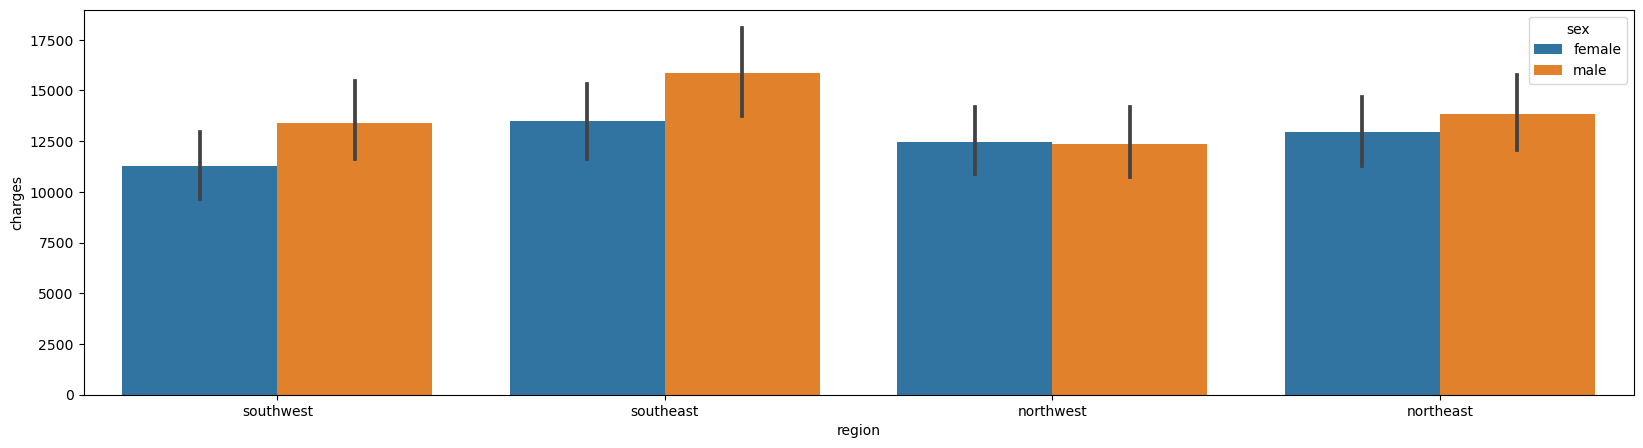

In [25]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = insurance_df)


it seems that there is not a statistical difference in terms of how gender in a particular region affects charges.



Charges by region and smoker

<AxesSubplot:xlabel='region', ylabel='charges'>

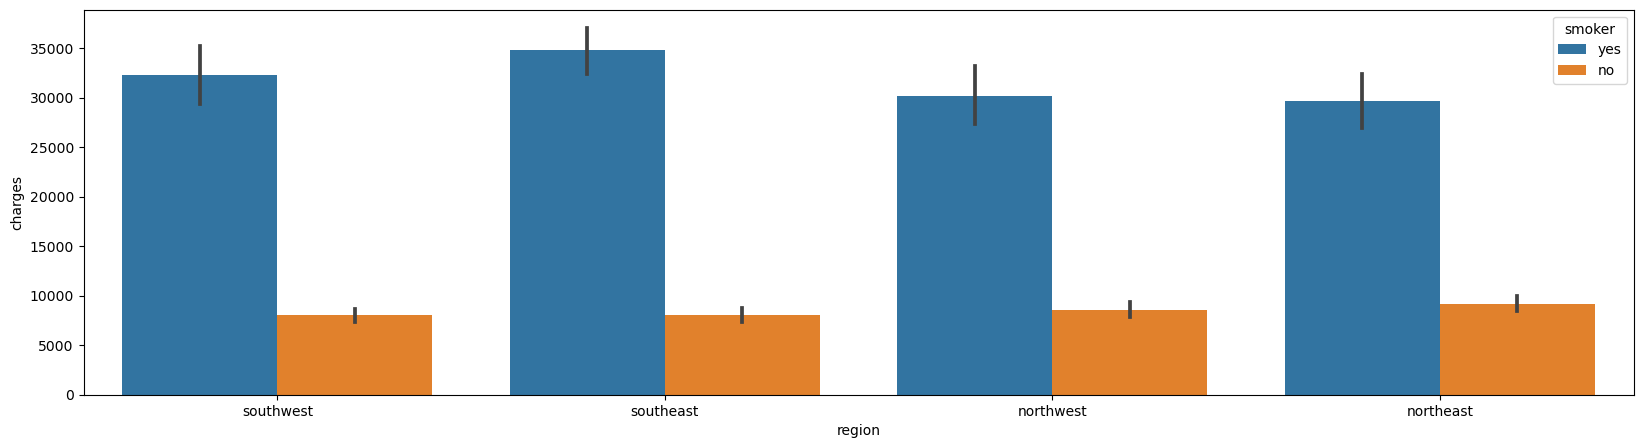

In [26]:
# setting Smoker as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = insurance_df)


 there seems to be a statistical significance in terms of how smoking behavior in a region affects charges.

Charges by age, bmi, and children based on smoking behavior

Text(0.5, 1.0, 'Number of children vs Medical Charges')

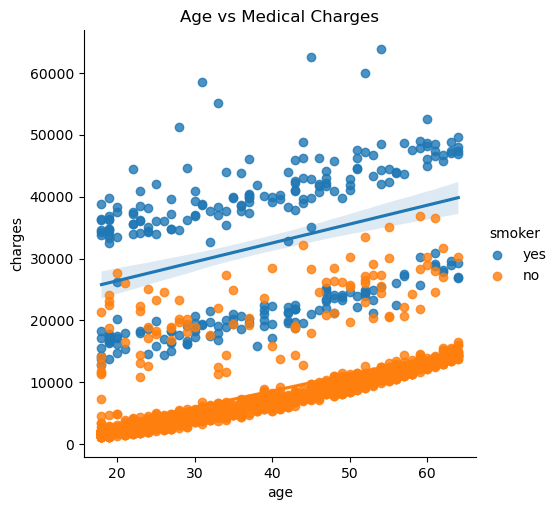

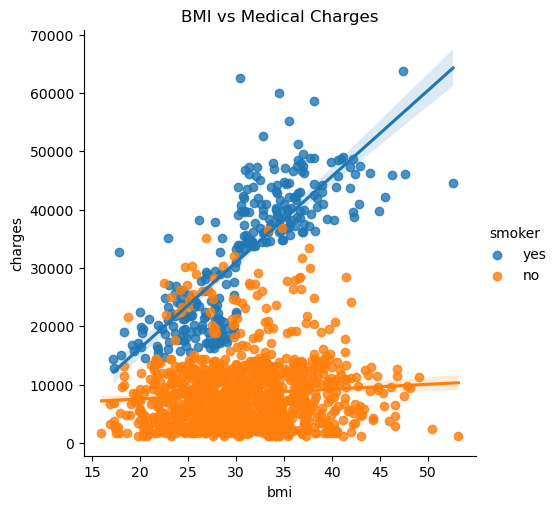

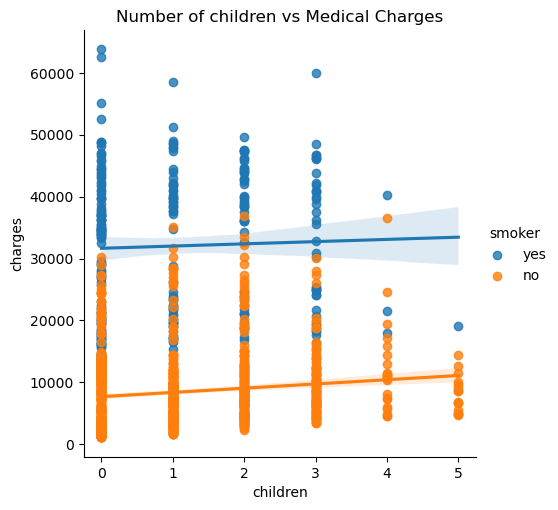

In [27]:
ax = sns.lmplot(x = 'age', y = 'charges', data = insurance_df, hue = 'smoker')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = insurance_df, hue = 'smoker')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = insurance_df, hue = 'smoker')
plt.title('Number of children vs Medical Charges')

Based on the analysis,

    We know that smoking has a great impact on medical costs.
    Smoking in combination with an increase in other factors, such as age, bmi, and children, further emphasizes and increases the medical cost due to smoking.


# Data Correlation

In [29]:
insurance_df[['region','sex','smoker']].dtypes

region    object
sex       object
smoker    object
dtype: object

In [30]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(insurance_df.region.drop_duplicates())
insurance_df.region = label.transform(insurance_df.region)

label.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = label.transform(insurance_df.sex)

label.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = label.transform(insurance_df.smoker)

insurance_df.dtypes


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

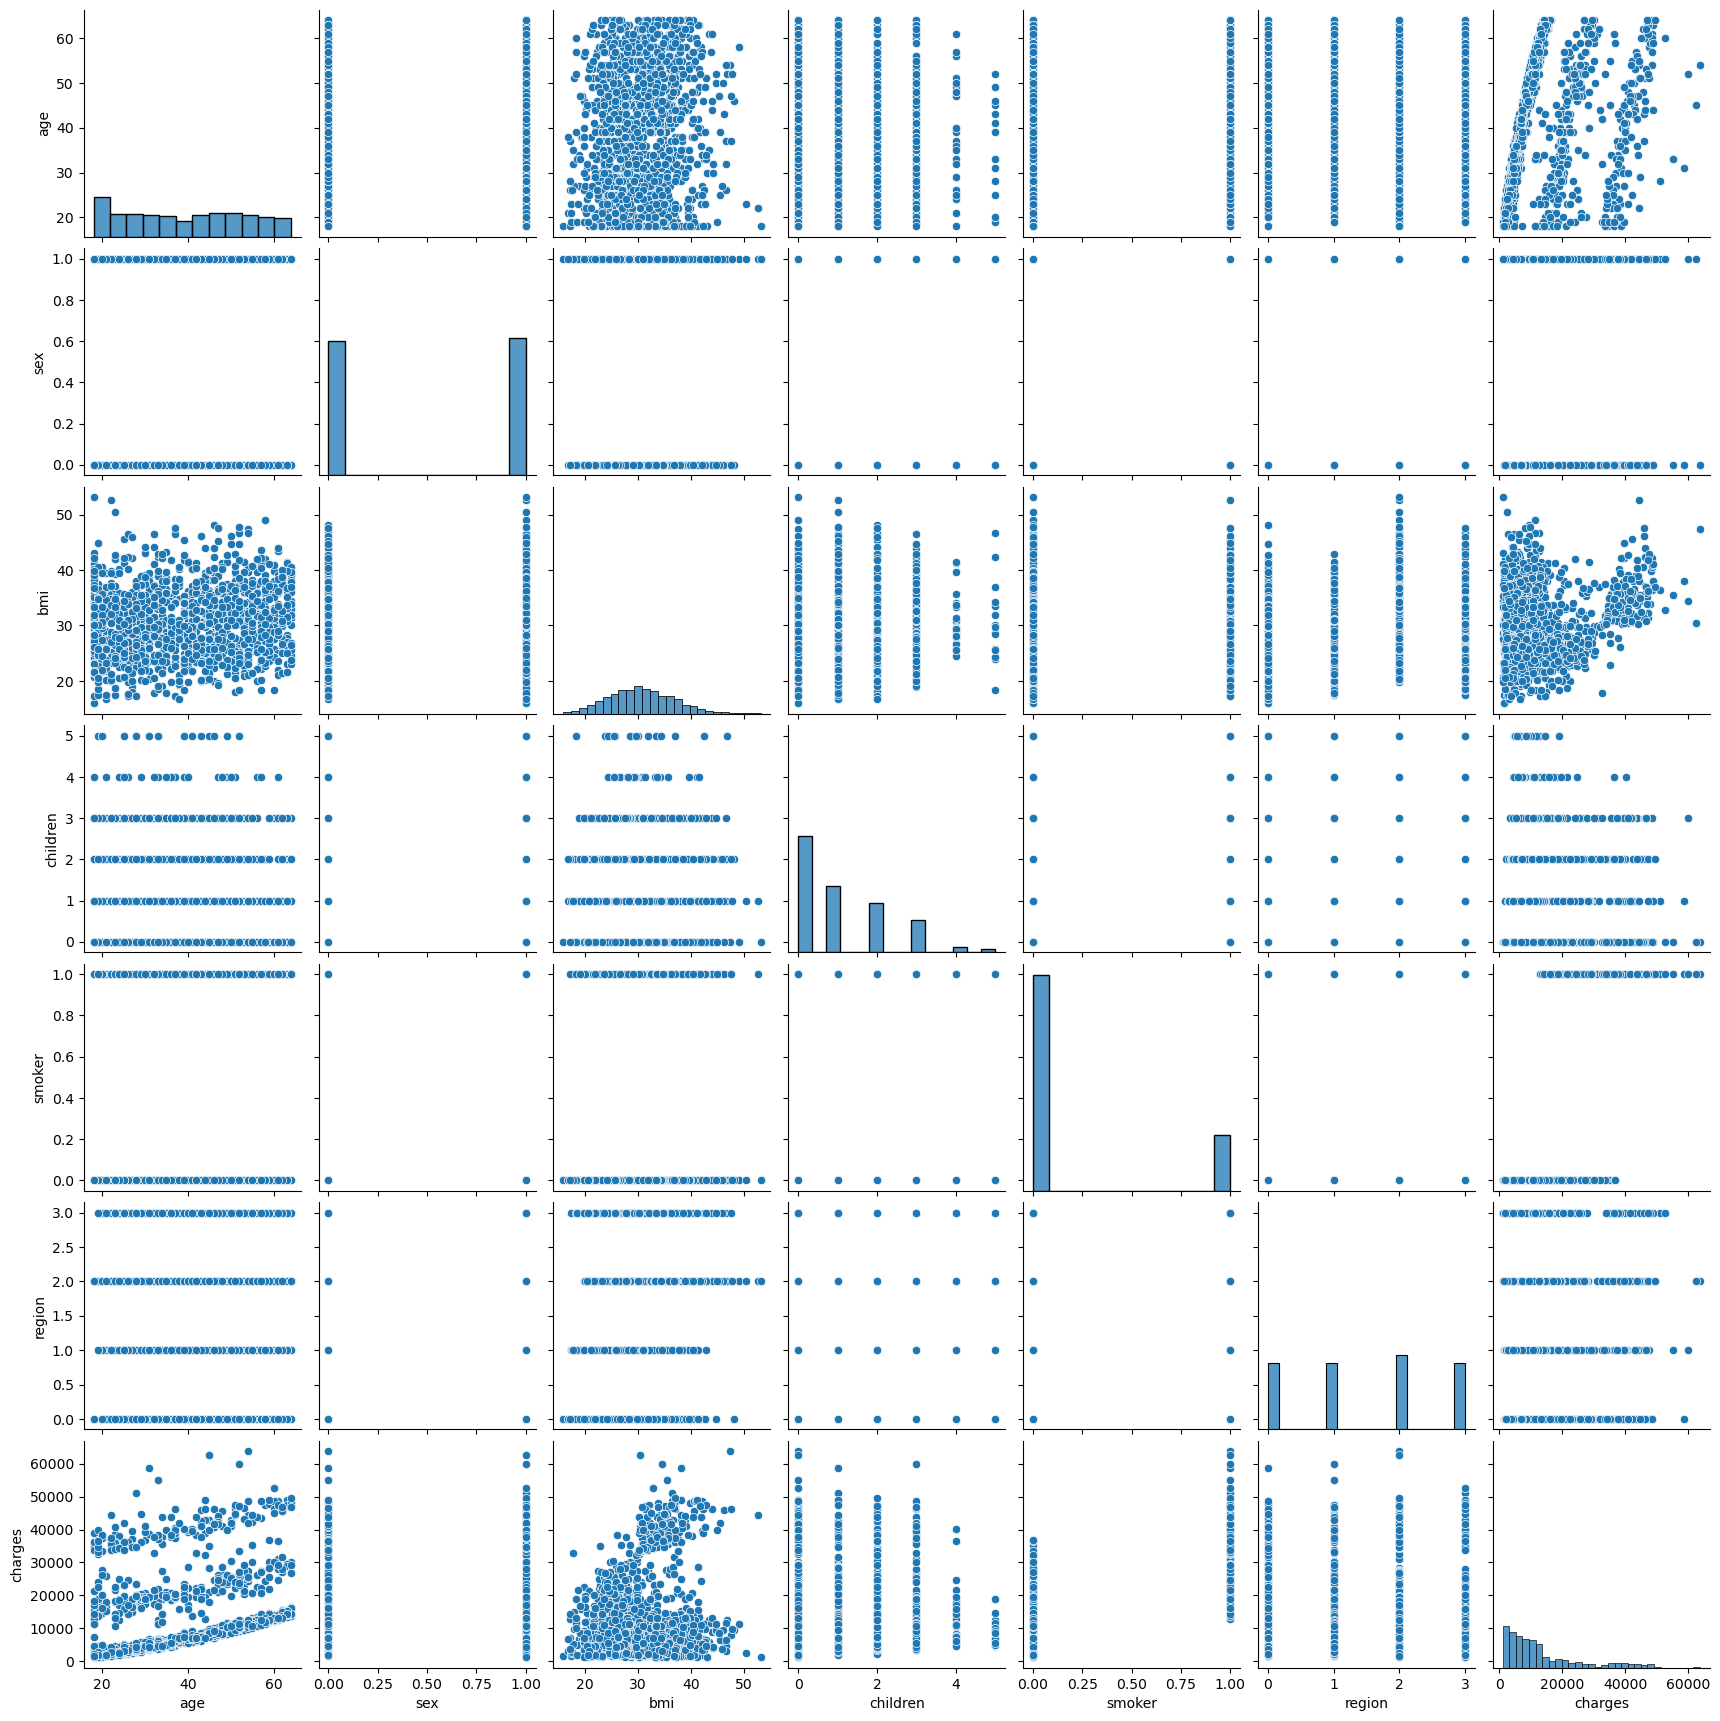

In [31]:
sns.pairplot(insurance_df)


Text(0.5, 1.0, 'Correlation Factors Heat Map')

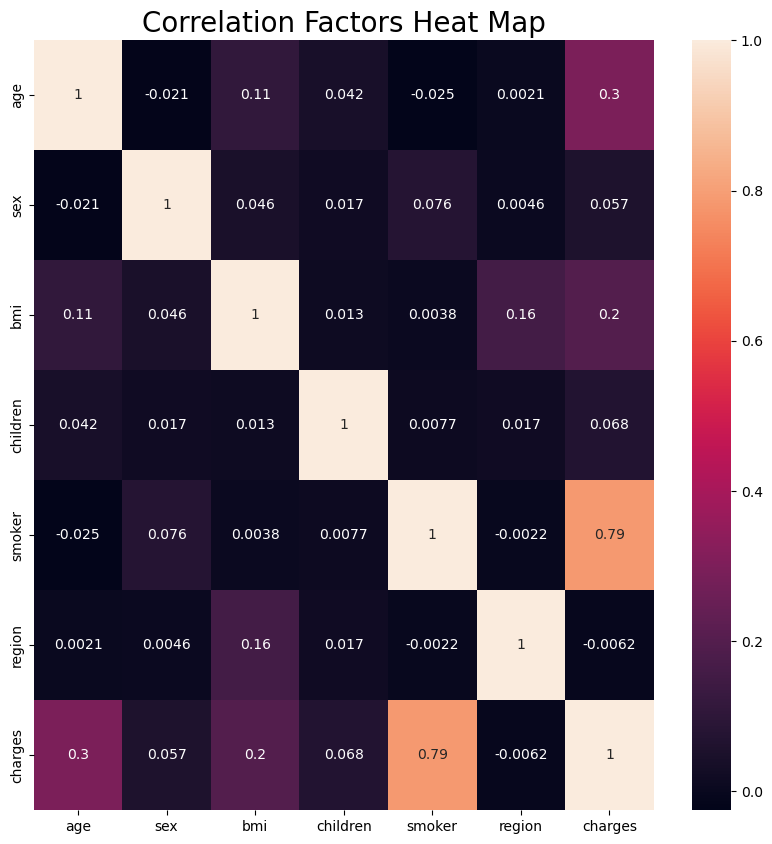

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(insurance_df.corr(), annot = True).set_title('Correlation Factors Heat Map', size = '20')


show that Variables that most influence charges are smoker, age, and BMI

# DATA PREPROCESSING

<AxesSubplot:xlabel='age'>

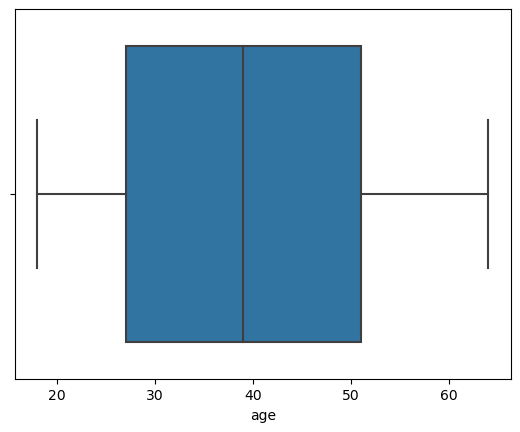

In [36]:
insurance_df.drop_duplicates(inplace=True)
sns.boxplot(insurance_df['age'])

<AxesSubplot:xlabel='bmi'>

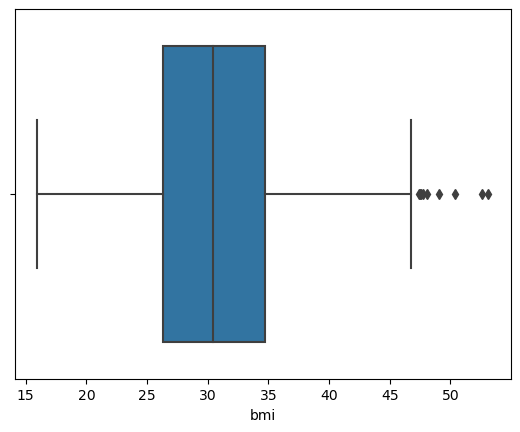

In [37]:
sns.boxplot(insurance_df['bmi'])

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

# Outliers Detection basesd on IQR¶

In [38]:
Q1=insurance_df.quantile(0.25)
Q2=insurance_df.quantile(0.5)
Q3=insurance_df.quantile(0.75)
iqr=Q3-Q1
print(iqr)

age            24.00000
sex             1.00000
bmi             8.41000
children        2.00000
smoker          0.00000
region          1.00000
charges     11911.37345
dtype: float64


In [41]:
df_new=insurance_df[~((insurance_df<(Q1-1.5*iqr))|(insurance_df>(Q3+1.5*iqr))).any(axis=1)]
df_new.shape

(1054, 7)

In [42]:
print('data loss percentage after removing outliers with IQR method',((insurance_df.shape[0]-df_new.shape[0])/insurance_df.shape[0])*100)

data loss percentage after removing outliers with IQR method 21.16679132385939


# outliers removal using z score¶

In [43]:
from scipy.stats import zscore

In [44]:
df3=insurance_df.copy()
z_score = zscore(df3)
z_score_abs = np.abs(z_score)

In [45]:
df_new= df3[(z_score_abs < 3).all(axis=1)]
df_new.shape

(1308, 7)

In [47]:
print('data loss percentage after removing outliers with IQR method',((insurance_df.shape[0]-df_new.shape[0])/insurance_df.shape[0])*100)

data loss percentage after removing outliers with IQR method 2.169035153328347


# Skewness detection

In [48]:
df_new.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.737050
smoker      1.481539
region     -0.024001
charges     1.436653
dtype: float64

Data in all the column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

# Checking Multicollinearity between features using variance_inflation_factor¶


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
df_new1=df_new.copy()
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new.values,i) for i in range(len(df_new.columns))]
vif['Features']= df_new1.columns
vif


,vif,Features
0,9.528362,age
1,1.995285,sex
2,10.616152,bmi
3,1.861432,children
4,4.018916,smoker
5,2.928493,region
6,8.162071,charges


Since there is no multicollinearity in data

# Standard Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
x=df_new.drop(['charges'],axis=1)
y=df_new['charges']

In [53]:
sc=StandardScaler()
x_scale=sc.fit_transform(x)

In [61]:
x=pd.DataFrame(x_scale)
x

,0,1,2,3,4,5
0,-1.440754,-1.004598,-0.449186,-0.930279,1.983897,1.351994
1,-1.511806,0.995423,0.533188,-0.040802,-0.504058,0.446975
2,-0.801288,0.995423,0.404324,1.738153,-0.504058,0.446975
3,-0.446029,0.995423,-1.318596,-0.930279,-0.504058,-0.458045
4,-0.517081,0.995423,-0.285179,-0.930279,-0.504058,-0.458045
...,...,...,...,...,...,...
1303,0.761851,0.995423,0.064594,1.738153,-0.504058,-0.458045
1304,-1.511806,-1.004598,0.223581,-0.930279,-0.504058,-1.363065
1305,-1.511806,-1.004598,1.048641,-0.930279,-0.504058,0.446975
1306,-1.298651,-1.004598,-0.800632,-0.930279,-0.504058,1.351994


# Model Building

In [68]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error


# Find best random state

In [64]:
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.3, random_state=i)
    log_reg=LinearRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)


Best accuracy is 0.807557745924143 on Random_state 60


In [66]:
 x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.3, random_state=maxRS)


In [70]:
model=[ LinearRegression(),
        SVR(),
        GradientBoostingRegressor(),DecisionTreeRegressor(),Lasso(),Ridge(),KNN(),
        RandomForestRegressor(),
        XGBRegressor()]

for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    pred_train=m.predict(x_train)
    print('Regression ML Algorithm Evaluation Matrix',m,'is' )
    print('\n')
    print('R2 Score :', r2_score(y_test, y_pred))
    print('\n')
    print('R2 score on training data :',r2_score(y_train, pred_train))
    print('\n')
    print('Mean absolute error is :',mean_absolute_error(y_test, y_pred))
    print('\n')
    print(' Root Mean Squared error is :',np.sqrt(mean_absolute_error(y_test, y_pred)))
    print('\n')
    print('==================================================')

Regression ML Algorithm Evaluation Matrix LinearRegression() is


R2 Score : 0.807557745924143


R2 score on training data : 0.7269499328673142


Mean absolute error is : 3767.196526880401


 Root Mean Squared error is : 61.37749202175339


Regression ML Algorithm Evaluation Matrix SVR() is


R2 Score : -0.07000606859322556


R2 score on training data : -0.09345427324762823


Mean absolute error is : 8208.52664532626


 Root Mean Squared error is : 90.60091967152573


Regression ML Algorithm Evaluation Matrix GradientBoostingRegressor() is


R2 Score : 0.9099649011764332


R2 score on training data : 0.8920359190274366


Mean absolute error is : 2253.1941338983133


 Root Mean Squared error is : 47.467822089267095


Regression ML Algorithm Evaluation Matrix DecisionTreeRegressor() is


R2 Score : 0.7760974386252323


R2 score on training data : 1.0


Mean absolute error is : 2508.7707334351144


 Root Mean Squared error is : 50.08763054323008


Regression ML Algorithm Evaluation Matrix

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
model=[ LinearRegression(),
        SVR(),
        GradientBoostingRegressor(),DecisionTreeRegressor(),Lasso(),Ridge(),KNN(),
        RandomForestRegressor(),
        XGBRegressor()]

for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    pred_train=m.predict(x_train)
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Regression ML Algorithm Evaluation Matrix',m,'is' )
    print('\n')
    print('score:',score)
    print('\n')
    print('mean score',score.mean())
    print('\n')
    print('Difference b/w r2 score and cross validation score is:-',(r2_score(y_test,y_pred)-score.mean())*100)
    print('\n')
    print('----------------------------------------------------')

Regression ML Algorithm Evaluation Matrix LinearRegression() is


score: [0.7633674  0.71275448 0.77995497 0.73048268 0.7662308 ]


mean score 0.7505580662519831


Difference b/w r2 score and cross validation score is:- 5.699967967215991


----------------------------------------------------
Regression ML Algorithm Evaluation Matrix SVR() is


score: [-0.1094586  -0.10827907 -0.06957355 -0.09762206 -0.10027347]


mean score -0.09704135073530558


Difference b/w r2 score and cross validation score is:- 2.7035282142080024


----------------------------------------------------
Regression ML Algorithm Evaluation Matrix GradientBoostingRegressor() is


score: [0.87659267 0.80543464 0.87926802 0.84914418 0.86326078]


mean score 0.8547400592842017


Difference b/w r2 score and cross validation score is:- 5.523855466368177


----------------------------------------------------
Regression ML Algorithm Evaluation Matrix DecisionTreeRegressor() is


score: [0.77347339 0.65187672 0.61956711 0.738

We can see that GradientBoostingRegressor gives the maximum accuracy, so  we will do Hyperparameter Tuning on GradientBoostingRegressor

# Hyperparameter Tuning¶

In [73]:
from sklearn.model_selection import GridSearchCV


In [83]:
parameters =  {'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
             

In [84]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters ,cv=5,n_jobs=-1)
model = grid.fit(x_train,y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'learning_rate': 0.19, 'n_estimators': 19} 

GradientBoostingRegressor(learning_rate=0.19, n_estimators=19) 



# Final Model

In [85]:
Model=GradientBoostingRegressor(learning_rate=0.19, n_estimators=19) 

Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
print('R2 Score :', r2_score(y_test, y_pred))
print('\n')
print('Mean square error is :',mean_squared_error(y_test, y_pred))
print('\n')
print('Mean absolute error is :',mean_absolute_error(y_test, y_pred))
print('\n')
print(' Root Mean Squared error is :',np.sqrt(mean_absolute_error(y_test, y_pred)))
print('\n')
print('==================================================')

R2 Score : 0.9114293666302634


Mean square error is : 12796413.071667237


Mean absolute error is : 2297.303259091087


 Root Mean Squared error is : 47.930191519449274




# Saving the model

In [87]:
import joblib
joblib.dump(Model,'Medical_insurance_cost_prediction.pkl')

['Medical_insurance_cost_prediction.pkl']

In [88]:
#lets load the saved model and get the prediction
model=joblib.load('Medical_insurance_cost_prediction.pkl')

In [89]:
prediction=model.predict(x_test)
prediction

array([ 9272.5337134 ,  2819.83544942, 35289.71067353, 20146.86797043,
        6963.24278442,  9427.8604566 , 23124.06120354,  5284.17593527,
       42692.11889648,  4190.40712933, 43846.46452103,  5955.2416511 ,
       15829.21238282, 12329.03966264,  7950.09717973, 14139.14366153,
        3778.23706316, 35537.56089223,  6024.56930672, 14487.12416749,
        4698.82340893, 12137.14830061, 37480.59072692, 41961.0082262 ,
        7152.11553607,  5727.00955098, 12492.91403415,  5860.22037294,
        8567.80814611, 11568.44433395,  5448.05030678, 23124.06120354,
       11052.25478404,  9621.28051083, 44000.39423613,  5233.93769509,
       12492.91403415,  6278.4898493 ,  3371.8147428 , 35289.71067353,
       23747.92644229,  6576.47170667, 11607.55627541, 13419.3072496 ,
       36193.47748601, 11607.55627541,  6368.63665255,  7449.55238321,
        8165.28531848, 15827.04436305, 44850.62508818,  4804.80264481,
        4190.40712933,  9469.48251175,  4035.08038613, 13779.8438684 ,
      

In [90]:
a=np.array(y_test)
a

array([ 7337.748  ,  1625.43375, 34472.841  , 20745.9891 ,  4189.1131 ,
       28340.18885, 21978.6769 ,  3410.324  , 42211.1382 ,  2134.9015 ,
       46200.9851 ,  4266.1658 , 12925.886  , 24227.33724,  6875.961  ,
       13063.883  ,  1534.3045 , 44585.45587,  5383.536  , 13880.949  ,
        2254.7967 , 11830.6072 , 38711.     , 43896.3763 ,  6360.9936 ,
       23288.9284 , 11455.28   ,  4454.40265,  8605.3615 ,  8968.33   ,
        3277.161  , 21259.37795,  8988.15875,  7731.4271 , 47055.5321 ,
        2913.569  , 11842.442  ,  6117.4945 ,  2007.945  , 36124.5737 ,
       24869.8368 ,  5469.0066 ,  8703.456  , 10942.13205, 38282.7495 ,
        8871.1517 ,  4040.55825,  7046.7222 ,  7985.815  , 13844.506  ,
       46661.4424 ,  1720.3537 ,  2257.47525,  8211.1002 ,  1748.774  ,
       11187.6567 , 11253.421  , 14449.8544 , 21984.47061,  7537.1639 ,
        6686.4313 ,  4571.41305, 40182.246  ,  5484.4673 , 46889.2612 ,
       40003.33225, 10601.412  , 18765.87545, 22331.5668 ,  9377

In [91]:
df=pd.DataFrame({'predicted':prediction,'original':a})
df

,predicted,original
0,9272.533713,7337.74800
1,2819.835449,1625.43375
2,35289.710674,34472.84100
3,20146.867970,20745.98910
4,6963.242784,4189.11310
...,...,...
388,13651.095297,12479.70895
389,4419.840208,3176.28770
390,14487.124167,12950.07120
391,6853.081390,5209.57885
